# Tasca 6A: Visualització gràfica Multiples variables

Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables.


In [55]:
# Carga de librerías

# Data wrangling
import numpy as np
import pandas as pd

# Graficos
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline 
import seaborn as sns

sns.set_theme()


## Nivell 1
### Exercici 1
Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".



In [2]:
tips=sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


En primer lugar voy a examinar gráficamente como son las distribuciones de mis variables. 

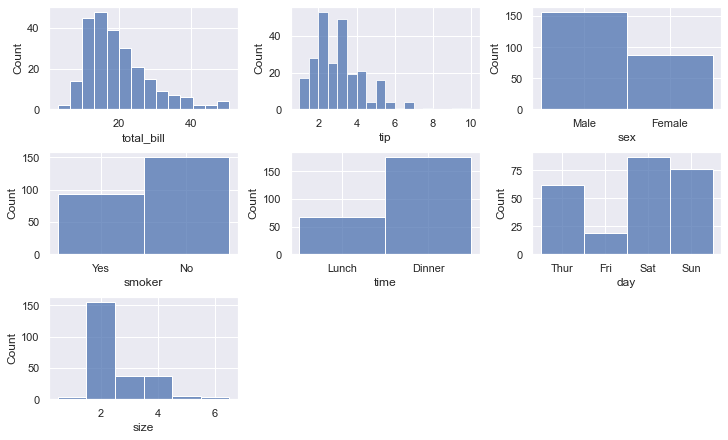

In [6]:
import matplotlib.gridspec as gridspec

# Creo la figura y el grid.
fig2 = plt.figure(constrained_layout=True, figsize=(10,6))
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)

# A cada axe le añado un plot tipo histograma (utilizo funciones basadas en axes)


for i in range(len(tips.columns)):
    if i < 3:
        ax=fig2.add_subplot(spec2[0,i])
        sns.histplot(data=tips, x=tips[tips.columns[i]])
    elif i<6:
        ax=fig2.add_subplot(spec2[1,(3-i)])
        sns.histplot(data=tips, x=tips[tips.columns[i]])
    else:
        ax=fig2.add_subplot(spec2[2,(6-i)])
        sns.histplot(data=tips, x=tips[tips.columns[i]],discrete=True)

El restuarante tiene aproximadamente el doble de clientes masculinos que femeninos, hay una mayor proporción de no fumadores y se hacen más servicios en el turno de cenas que el de almuerzos.

Los viernes hay mucho menos trabajo y el día con más servicios es el sábado seguido de cerca del domingo.

La mayoría de mesas es de dos personas, aunque también tenemos mesas de tres y cuatro comensales y muy ocasionalmente han habido mesas de uno, cinco y hasta seis personas.

la deiana del gasto está alrededor de los 15 € y la mayoría de propinas está entre los 2 y los 3 €.

### Relaciones entre variables.
Seguidamente compruebo como están relacionadas las propinas (tip) y el total de la cuenta (total_bill). Añadiendo una tercera variable que es el tamaño de la mesa (size).

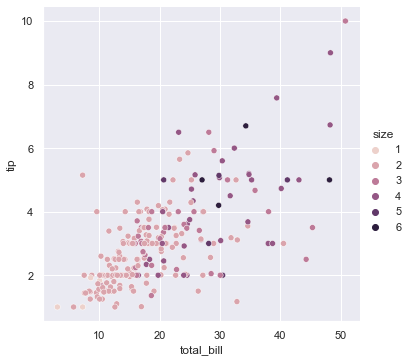

In [7]:
# Scatterplot tip vs total_bill
sns.relplot(data=tips, x='total_bill', y='tip', hue='size');

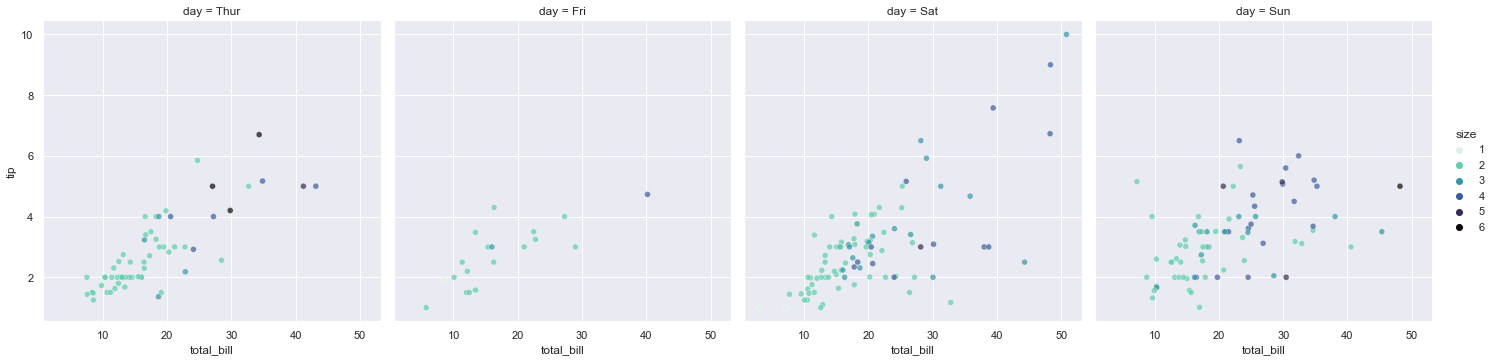

In [8]:
# Scatterplot tip vs total_bill por días
sns.color_palette("mako", as_cmap=True)
sns.relplot(data=tips, x='total_bill', y='tip', hue='size',col='day', col_wrap=4, alpha=0.7, palette='mako_r')


Da la sensación de que los sábados y domingos se da menos propina

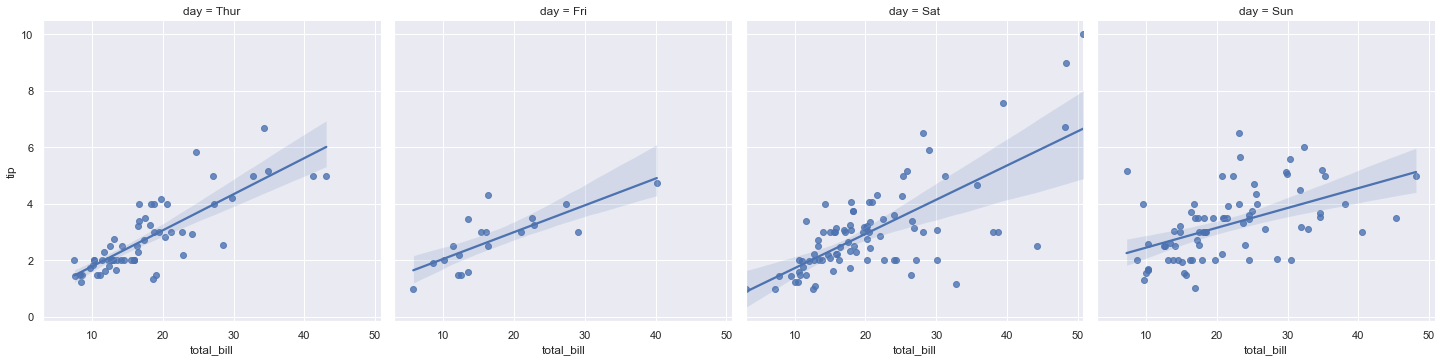

In [9]:
sns.lmplot(data=tips, x='total_bill', y='tip',col='day')

Vemos como la propina está relacionada con el total de la cuenta. Y como el tamaño de la mesa también influye en el total de la cuenta.

### Valores por categorías.

Text(0.5, 0.98, 'Valor de la cuenta media por día, servicio, sexo y fumador')

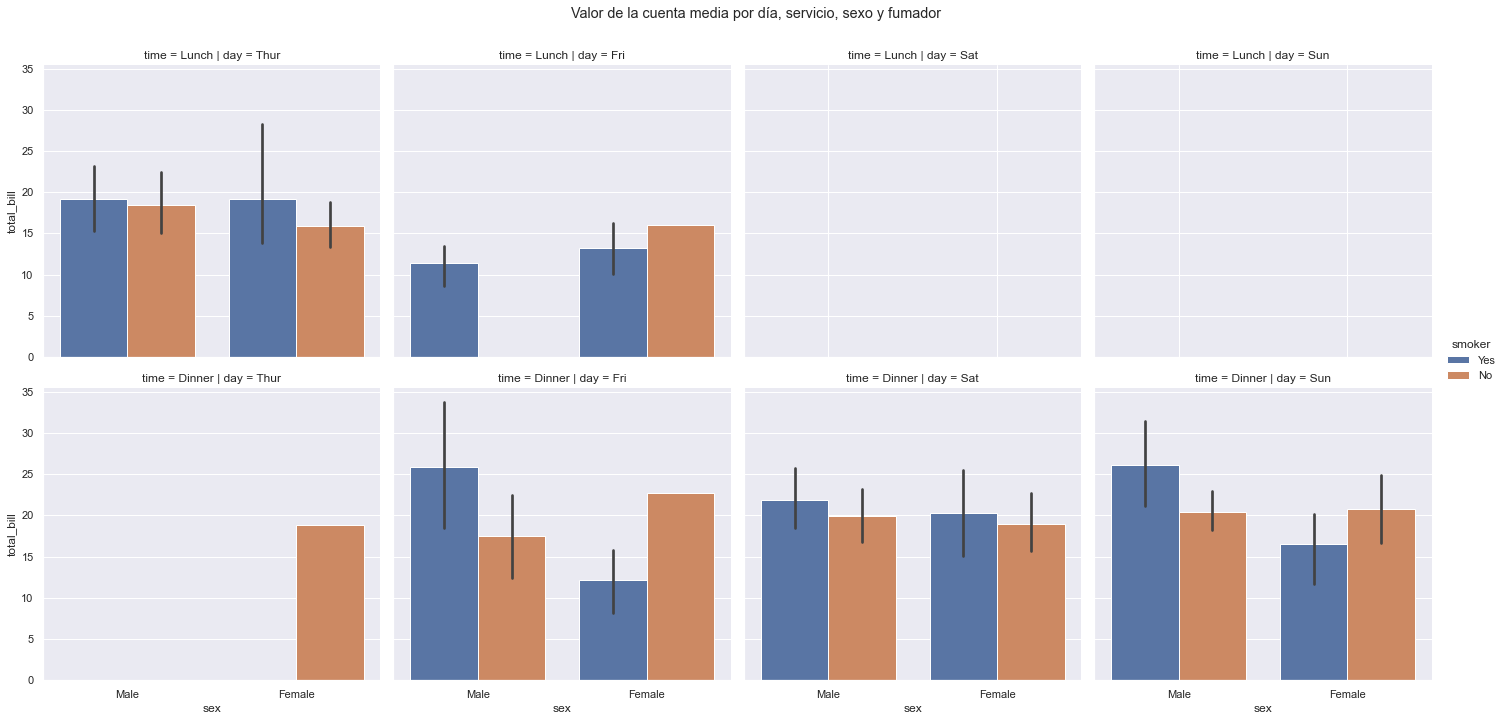

In [10]:
# Valor de la cuenta media por día, servicio, sexo y fumador
gr1=sns.catplot(data=tips,x='sex',y='total_bill',kind='bar', hue='smoker', col='day',row='time' )
gr1.fig.subplots_adjust(top=0.9)
gr1.fig.suptitle('Valor de la cuenta media por día, servicio, sexo y fumador')

Text(0.5, 0.98, 'Distribución de las propinas por día, servicio, sexo y fumador')

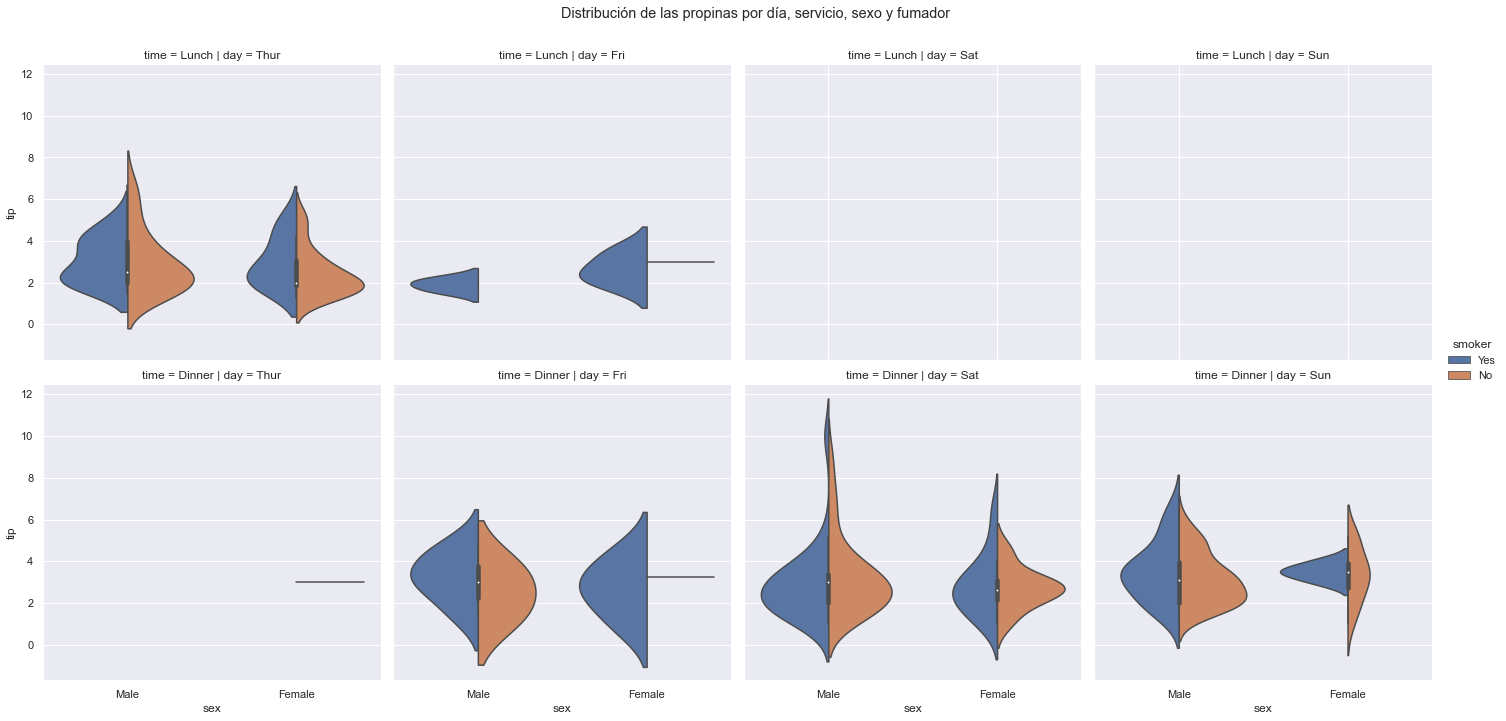

In [11]:
# Distribución de las propinas por día, servicio, sexo y fumador
rp=sns.catplot(data=tips,x='sex',y='tip',kind='violin', hue='smoker', col='day',row='time', split=True)
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Distribución de las propinas por día, servicio, sexo y fumador')

In [12]:
# Creo una variable que sea el procentaje de propina sobre el total de la cuenta.
tips['tip_pct']=round(tips.tip/tips.total_bill*100,1)

In [13]:
tips.tip_pct.median()

15.45

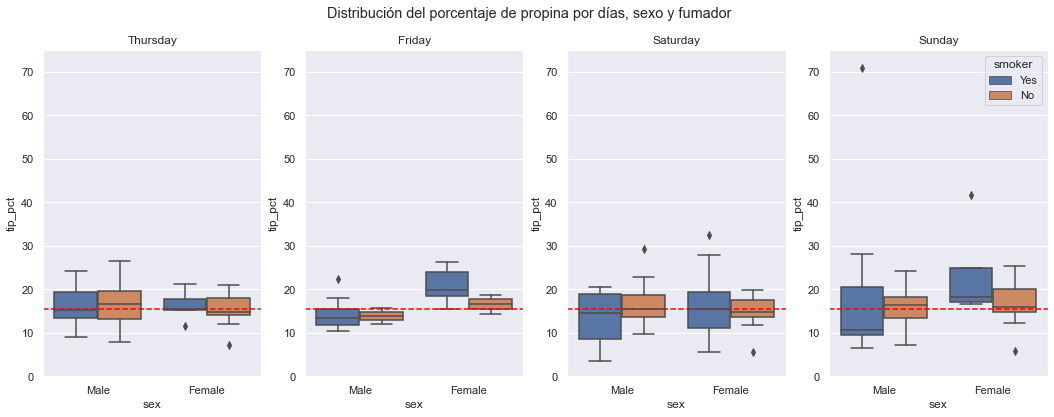

In [14]:
#sns.catplot(data=tips,x='sex',y='tip_pct',kind='boxen', hue='smoker', col='day')#,row='time' )
plt.figure(figsize=(18,6))
plt.suptitle('Distribución del porcentaje de propina por días, sexo y fumador')
# Subplot 1. Thursday plot
plt.subplot(141)
ax1=sns.boxplot(data=tips[tips['day']=='Thur'],x='sex',y='tip_pct', hue='smoker')
plt.ylim(0,75)
plt.axhline(y=tips.tip_pct.median(),color='red',ls='--')
ax1.get_legend().remove()
ax1.set(title='Thursday')

# Subplot 1. Friday plot
plt.subplot(142)
ax2=sns.boxplot(data=tips[tips['day']=='Fri'],x='sex',y='tip_pct', hue='smoker')
plt.ylim(0,75)
plt.axhline(y=tips.tip_pct.median(),color='red',ls='--')
ax2.get_legend().remove()
ax2.set(title='Friday')

#Subplot 3. Saturday plot
plt.subplot(143)
ax3=sns.boxplot(data=tips[tips['day']=='Sat'],x='sex',y='tip_pct', hue='smoker')
plt.ylim(0,75)
plt.axhline(y=tips.tip_pct.median(),color='red',ls='--')
ax3.get_legend().remove() # Quitar leyenda
ax3.set(title='Saturday')

# Subplot 4. Sunday plot
plt.subplot(144)
ax4=sns.boxplot(data=tips[tips['day']=='Sun'],x='sex',y='tip_pct', hue='smoker')
ax4.set(title='Sunday')
plt.ylim(0,75)
plt.axhline(y=tips.tip_pct.median(),color='red',ls='--')



## Nivell 2
### Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

###### Nivell 3
### Exercici 3
Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.


_Puesto que los ejercicios 2 y 3 pretenden analizar visualmente el mismo dataset los voy a desarrollar conjuntamente._

# 1. Carga del archivo.

En primer lugar cargaremos el archivo movies.dat. 

In [15]:
# Cargo el archivo con la funcion read_table
movies=pd.read_table('movies.dat',sep='::', header=None , engine='python')

In [16]:
#Renombro las columnas
movies.columns=['Id','Nombre', 'Categoria']
movies.head()

,Id,Nombre,Categoria
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         3883 non-null   int64 
 1   Nombre     3883 non-null   object
 2   Categoria  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


# 2. Prepocesado y preparación del dataset. 

## 2.1. Nuevas variables.

### 2.1.1. Variable Fecha
Primero quiero extraer el año de la película para generar un campo nuevo que se llamará 'Fecha'.

In [18]:
# movies.Nombre.str.extractall(r'(\d\d\d\d)')[0].unique()


In [19]:
# Extraigo la fecha
movies['Fecha']=movies.Nombre.str.slice(-5,-1).astype('int')
movies['Fecha'].unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

### 2.1.2. Variable Nombre

In [20]:
# Extraigo el nombre de la película
movies.Nombre=movies.Nombre.str.slice(0,-7)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         3883 non-null   int64 
 1   Nombre     3883 non-null   object
 2   Categoria  3883 non-null   object
 3   Fecha      3883 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 106.3+ KB


In [21]:
movies

,Id,Nombre,Categoria,Fecha
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


### 2.1.3. Variable categoría

In [22]:
# Cuantas categorías diferentes existen
movies.Categoria.unique().shape

(301,)

In [23]:
movies.Categoria.head(5)

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: Categoria, dtype: object

Tenemos más de trescientas categorías, el problema es que muchas películas están catalogadas con más de una categoría. Para simplificar el problema tengo que extraer la información, construyendo una matriz con una columna por categoría, de esta manera, tendré campos duplicados parciales, es decir la película cero que tenía tres categorías se repetirá en tres ocasiones con diferente categoría.

In [24]:
# movies.Categoria.str.split('|',expand=True)
# pd.get_dummies(movies.Categoria.str.split('|',expand=True)).columns
# Puedo hacer esto con pandas, pero el proceso es muy largo y poco elegante.
# Sin embargo aprovechando la potencia de numpy se resuelve con pocas líneas de código.

In [25]:
# Obtengo la lista de generos
generos=[]
for pelicula in movies.Categoria:
    gens=pelicula.split('|')
    for i in gens:
        if i not in generos:
            generos.append(i)
print('En total hay ',len(generos),' géneros diferentes \n')
print(generos)

En total hay  18  géneros diferentes 

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']


Tengo un total de 18 géneros diferentes. Luego tendré que replicar una matriz con 18 columnas y 3883 filas que son el número de películas de mi filmoteca.

In [26]:
# Matriz de ceros con las dimensiones de las películas y los géneros
GEN=np.zeros((3883,18))

In [27]:
# Creo Dataframe para géneros
generos=pd.DataFrame(GEN,columns=generos)

Una vez tengo mi dataframe, lo que hago es ir recorriendo la serie categorías e ir extrayendo las diferentes categorías por registro; con ayuda de el método enumerate, ontengo el índice con el que tengo que buscar en mi matriz de géneros y cuando coincida la categoría a esa columna le doy un valor de 1.

In [28]:
# Asigno valor 1 si esa pelicula tiene ese genero
for i,pelicula in enumerate(movies.Categoria):
    lista=pelicula.split('|') #Para cada indice de la variable categoria genero una lista con los géneros
    for elemento in lista:
        generos.loc[i,elemento]=1 # Cada elemento de la lista valdrá 1 en su columna
generos

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finalmente uno los dos dataframes.

In [29]:
movies_wide=movies.join(generos)
movies_wide

,Id,Nombre,Categoria,Fecha,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story,Animation|Children's|Comedy,1995,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,Comedy|Romance,1995,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,Comedy|Drama,1995,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,Comedy,1995,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream,Drama,2000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland,Drama,2000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House,Drama,2000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.1.4.Variable NumEtiquetas

Añado una variable nueva que es el número de etiquetas por película. 

In [30]:
# Número de etiquetas que tiene una película
movies_wide['NumEtiquetas']=movies_wide['Categoria'].str.split('|').str.len()

# Número de películas
movies_wide['NumPeliculas']=1

# Inversa del número de etiquetas que tiene una película
movies_wide['FactorPelicula']=1/movies_wide['NumEtiquetas']


In [31]:
movies_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3883 non-null   int64  
 1   Nombre          3883 non-null   object 
 2   Categoria       3883 non-null   object 
 3   Fecha           3883 non-null   int32  
 4   Animation       3883 non-null   float64
 5   Children's      3883 non-null   float64
 6   Comedy          3883 non-null   float64
 7   Adventure       3883 non-null   float64
 8   Fantasy         3883 non-null   float64
 9   Romance         3883 non-null   float64
 10  Drama           3883 non-null   float64
 11  Action          3883 non-null   float64
 12  Crime           3883 non-null   float64
 13  Thriller        3883 non-null   float64
 14  Horror          3883 non-null   float64
 15  Sci-Fi          3883 non-null   float64
 16  Documentary     3883 non-null   float64
 17  War             3883 non-null   f

Para visualizar los datos voy a eliminar las variables Nombre y categoría y voy a agrupar por año.

In [32]:
# Elimino variables
movies_wide.drop(columns=['Nombre','Categoria'], axis=1, inplace=True)
movies_wide.shape

(3883, 23)

In [33]:
# Agrupo por año con la opción as_index=False para que el año siga siendo una variable y no pase al índice.
movies_wide_year=movies_wide.groupby('Fecha', as_index=True).sum().astype('int').sort_index(ascending=False).copy()


In [34]:
movies_wide_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 2000 to 1919
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              81 non-null     int32
 1   Animation       81 non-null     int32
 2   Children's      81 non-null     int32
 3   Comedy          81 non-null     int32
 4   Adventure       81 non-null     int32
 5   Fantasy         81 non-null     int32
 6   Romance         81 non-null     int32
 7   Drama           81 non-null     int32
 8   Action          81 non-null     int32
 9   Crime           81 non-null     int32
 10  Thriller        81 non-null     int32
 11  Horror          81 non-null     int32
 12  Sci-Fi          81 non-null     int32
 13  Documentary     81 non-null     int32
 14  War             81 non-null     int32
 15  Musical         81 non-null     int32
 16  Mystery         81 non-null     int32
 17  Film-Noir       81 non-null     int32
 18  Western         81 non-null

In [35]:
movies_wide_year.head()

,Id,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,NumEtiquetas,NumPeliculas,FactorPelicula
Fecha,,,,,,,,,,,,,,,,,,,,,
2000,572660,8,9,69,6,1,17,55,19,8,...,10,8,2,1,1,0,0,247,156,114
1999,842090,7,11,103,7,2,37,130,27,12,...,15,15,4,1,5,0,1,431,283,218
1998,777010,8,18,112,16,2,58,166,44,25,...,17,18,5,3,10,3,1,572,337,241
1997,564155,6,22,98,22,6,52,139,43,26,...,18,11,10,5,15,2,0,540,315,225
1996,372088,7,20,115,22,5,48,150,37,23,...,14,19,8,7,6,2,1,541,345,263


## 2.2.Transformación de dataset desordenado (untidy) a ordenado (tidy).

Tenemos un dataframe desordenado, en el que las variables referentes a categoría se podrían agrupar en una nueva variable que sería categórica y recogería todos los géneros. Voy a hacer una operacion de pivotado utilizando el método melt.  

### 2.2.1. Obtención de un dataframe largo con duplicados parciales.

In [36]:
# Lista de veriables que quiero incluir en la categoría genero.
categorias=movies_wide.columns[2:-3] #Columnas por categorías
categorias

Index(['Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [37]:
# Unpivot del dataframe movies_wide con la lista de variables a pivotar
movies_long=pd.melt(movies_wide,
                    value_vars=categorias,var_name='Genero',
                    value_name='Etiquetas',ignore_index=False).sort_index(ascending=True) #Unpivot
movies_long

,Genero,Etiquetas
0,Animation,1.0
0,Musical,0.0
0,Children's,1.0
0,War,0.0
0,Documentary,0.0
...,...,...
3882,Documentary,0.0
3882,War,0.0
3882,Musical,0.0
3882,Action,0.0


In [38]:
# Left Join para obtener el código de película y fecha
movies_final_long=movies_long.merge(movies[['Id','Fecha']],
                                    how='left',
                                    right_index=True,
                                    left_index=True)

# Left join con factor película y luego multiplicado por etiqueta para computar el total de peliculas.
movies_final_long=movies_final_long.merge(movies_wide[['FactorPelicula']],
                                    how='left',
                                    right_index=True,
                                    left_index=True)
movies_final_long.FactorPelicula=movies_final_long.Etiquetas*movies_final_long.FactorPelicula

#movies_final_long.drop(columns=['Nombre','Categoria'],inplace=True)


In [39]:
movies_final_long.head(36)

,Genero,Etiquetas,Id,Fecha,FactorPelicula
0,Animation,1.0,1,1995,0.333333
0,Musical,0.0,1,1995,0.000000
0,Children's,1.0,1,1995,0.333333
0,War,0.0,1,1995,0.000000
0,Documentary,0.0,1,1995,0.000000
0,Sci-Fi,0.0,1,1995,0.000000
0,Western,0.0,1,1995,0.000000
0,Mystery,0.0,1,1995,0.000000
0,Horror,0.0,1,1995,0.000000
0,Thriller,0.0,1,1995,0.000000


In [40]:
movies_final_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69894 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genero          69894 non-null  object 
 1   Etiquetas       69894 non-null  float64
 2   Id              69894 non-null  int64  
 3   Fecha           69894 non-null  int32  
 4   FactorPelicula  69894 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 2.9+ MB


He obtenido un dataframe ordenado con el año, el género, el número de etiquetas por genero y (ojo) el número total de películas en ese año.

### 2.2.2. Creación de la variable década.

Dando un paso más obtengo una nueva variable que me va a servir para futuras agrupaciones, la década.

In [41]:
# Nueva variable categórica década
movies_final_long['Decada']=0
movies_final_long.loc[movies_final_long['Fecha']<1930,'Decada']='20s'
movies_final_long.loc[(movies_final_long['Fecha']>=1930)&( movies_final_long['Fecha']<1940),'Decada']='30s'
movies_final_long.loc[(movies_final_long['Fecha']>=1940) &( movies_final_long['Fecha']<1950), 'Decada']='40s'
movies_final_long.loc[(movies_final_long['Fecha']>=1950) &( movies_final_long['Fecha']<1960), 'Decada']='50s'
movies_final_long.loc[(movies_final_long['Fecha']>=1960) &( movies_final_long['Fecha']<1970), 'Decada']='60s'
movies_final_long.loc[(movies_final_long['Fecha']>=1970) &( movies_final_long['Fecha']<1980), 'Decada']='70s'
movies_final_long.loc[(movies_final_long['Fecha']>=1980) &( movies_final_long['Fecha']<1990), 'Decada']='80s'
movies_final_long.loc[(movies_final_long['Fecha']>=1990) &( movies_final_long['Fecha']<=2000), 'Decada']='90s'


In [42]:
movies_final_long.columns=['Genero','Etiquetas','Ids' ,'Fecha', 'Peliculas' ,'Decada']
movies_final_long.head()

,Genero,Etiquetas,Ids,Fecha,Peliculas,Decada
0,Animation,1.0,1,1995,0.333333,90s
0,Musical,0.0,1,1995,0.000000,90s
0,Children's,1.0,1,1995,0.333333,90s
0,War,0.0,1,1995,0.000000,90s
0,Documentary,0.0,1,1995,0.000000,90s


In [43]:
movies_final_long.to_csv('movies_long.csv')

# 3. Analizando mi filmoteca.

## 3.1. Generos favoritos en la filmoteca.

Como habíamos visto hasta ahora, tengo una filmoteca con 3883 películas grabadas entre 1919 y 2000 de dieciocho géneros diferentes. Para empezar me gustaría saber cuales son los generos favoritos de mi filmoteca.

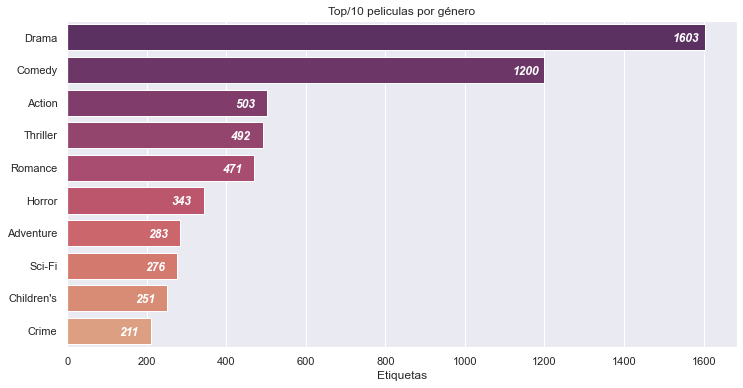

In [94]:
# Top 10 de películas

fig, ax=plt.subplots(figsize=(12, 6))

datos=movies_final_long.groupby('Genero').sum().reset_index().sort_values(by='Etiquetas', ascending=False).head(10)

top10=sns.barplot(data=datos,
                  x='Etiquetas',
                  y='Genero',
                  ci=None,
                  palette='flare_r',
                  )

# Configuarion de imgen 
top10.set(title='Top/10 peliculas por género',
          ylabel=None,
         )

# Anotaciones
for i in range(10):
    top10.annotate(text=int(datos.iloc[i,1]),
                  xy=(datos.iloc[i,1]-80,i+0.15),
                  xycoords='data',
                  color='w',
                  weight='bold',
                  fontstyle='oblique');
    

# Guardar imagen
plt.savefig('top10',dpi=200)


Se puede ver como el drama y la comedia son los géneros predominantes en mi filmoteca. 

## 3.2. Distribución del número de peliculas y etiquetas de género por año.

Tenemos 3883 películas en nuestra filmoteca, pero no sabemos si son recientes o son antiguas. Para responder a esta pregunta veamos la evolución del número de películas por año de nuestra filmoteca.

In [45]:
# Preparo el dataset con el número de peliculas anuales.
peliculas_anual=movies_final_long.groupby('Fecha')[['Peliculas']].sum()

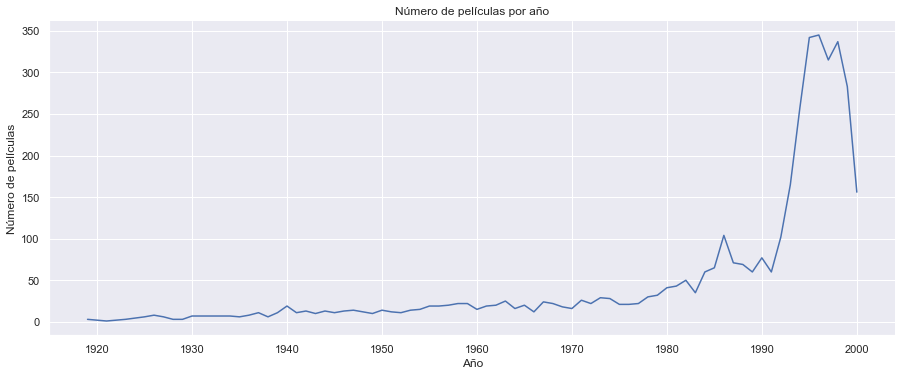

In [46]:
# Genero la imagen
anual = sns.relplot(data=peliculas_anual,
            kind='line',
            y='Peliculas',
            x='Fecha',
            height=5,
            aspect=2.5,);

# Añado las etiquetas
anual.set(title='Número de películas por año',
            xlabel='Año',
            ylabel='Número de películas'); 
#imagen2.fig.autofmt_xdate()

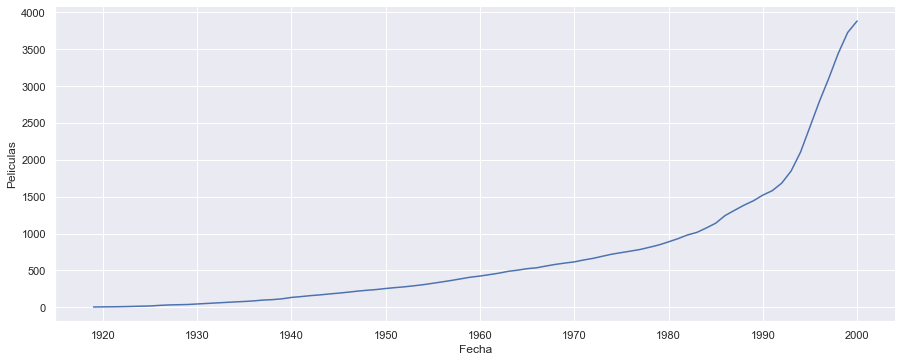

In [47]:
#Acumulado de peliculas
sns.relplot(data=movies_final_long.groupby('Fecha')[['Peliculas']].sum().cumsum(),
            kind='line',
            y='Peliculas',
            x='Fecha',
            height=5,
            aspect=2.5,);


Más de la mitad de las películas de nuestra filmoteca corresponden a la década de los 90. Mientras que el resto de los títulos estuvo grabado entre 1919 y 1990.

Como se observa el durante entre 1920 y 1980 podemos asociar el aumento del número de películas con un crecimiento lineal y a partir de principios de los 80 cada año aumenta el número de películas de forma exponencial.  

### Número de peliculas / etiquetas por año

Como hemos podido comprobar las películas pueden ir clasificadas con más de una etiqueta de género. Veremos ahora como se comportan las dos variables yu si están relacionadas.

In [48]:
# Preparo un dataset con totales de etiquetas y peliculaes por año.
etiquetas_anual=movies_final_long.groupby('Fecha')[['Etiquetas']].sum()
etiquetas_anual=etiquetas_anual.join(peliculas_anual)

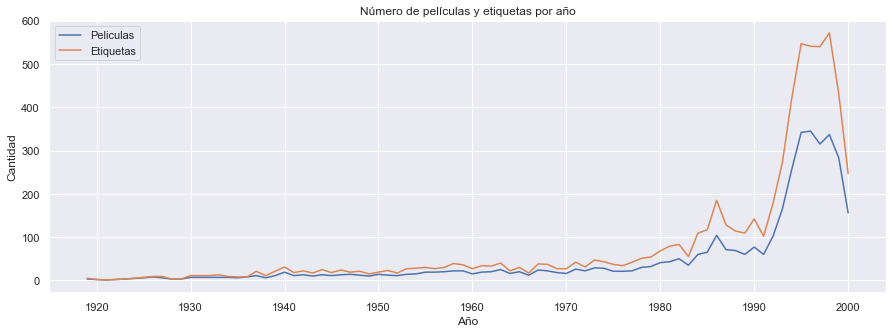

In [93]:
# Genero la imagen
fig,ax=plt.subplots(figsize=(15,5))

sns.lineplot(data=peliculas_anual,
            y='Peliculas',
            x='Fecha',
            label='Peliculas')

sns.lineplot(data=etiquetas_anual,
            y='Etiquetas',
            x='Fecha',
            label='Etiquetas')


# Añado las etiquetas a la imagen
ax.set(title='Número de películas y etiquetas por año',
       xlabel='Año',
       ylabel='Cantidad');


# Guardar imagen
plt.savefig('pelicula_etiqueta_serie',dpi=200)


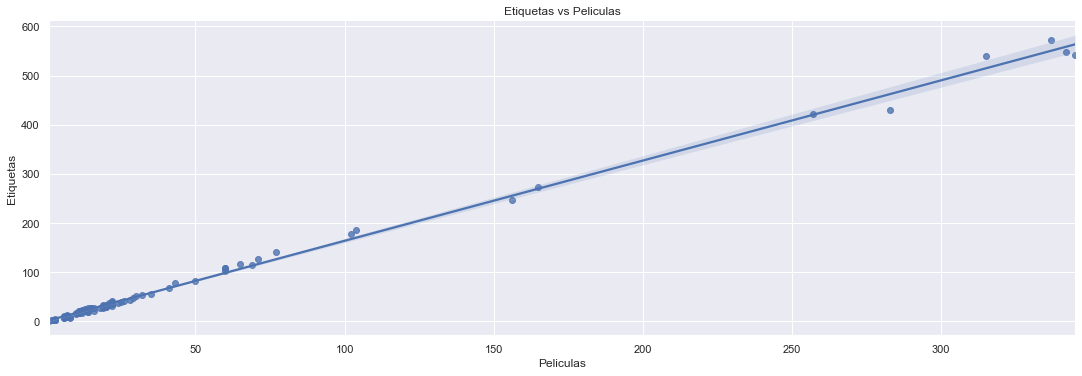

In [50]:
# Relación entre el número de etiquetas y el número de películas

lin=sns.lmplot(data=etiquetas_anual,
            x='Peliculas',
            y='Etiquetas',
            height=5,
            aspect=3)
lin.set(title='Etiquetas vs Peliculas');

In [51]:
# Nueva variable etiquetas/peliculas
etiquetas_anual['FactorEtiqueta']=etiquetas_anual['Etiquetas']/etiquetas_anual['Peliculas']
etiquetas_anual.reset_index(inplace=True)

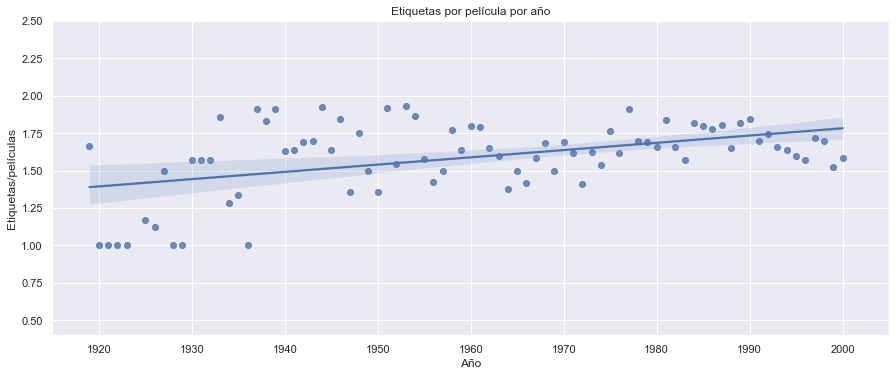

In [80]:
# Genero la imagen
im3 = sns.lmplot(data=etiquetas_anual,
#            kind='scatter',
            y='FactorEtiqueta',
            x='Fecha',
            height=5,
            aspect=2.5,);

# Añado las etiquetas
im3.set(title='Etiquetas por película por año',
            xlabel='Año',
            ylabel='Etiquetas/películas',
            xlim=(1915,2005),
            ylim=(0.4,2.5)); 
#imagen2.fig.autofmt_xdate()

El número promedio de géneros con que se cataloga una película esta en torno a 1,6. Las variables nº de etiquetas y nº de película tienen una relación lineal. 

## 3.3. Analizando las asociaciones entre géneros. 
### 3.3.1. Matriz de co-ocurrencia entre géneros.

En la tabla generos tengo información relativa a qué generos aparecen en cada película y cuando se catalogan simultánemaente los géneros en una misma película, podemos entonces construir una matriz de co/ocurrencia o de asociaciones; la matriz de asociación o de co/ocurrencia nos da información sobre el número de ocasiones que dos variables ocurren simultáneamente. Se obtiene haciendo la multiplicación matricial de las transpuesta de la matriz por la matriz.


In [53]:
# Matriz de coocurrencia
X=generos.T.dot(generos).astype('int')

O más gráficamente con un heatmap anotado.

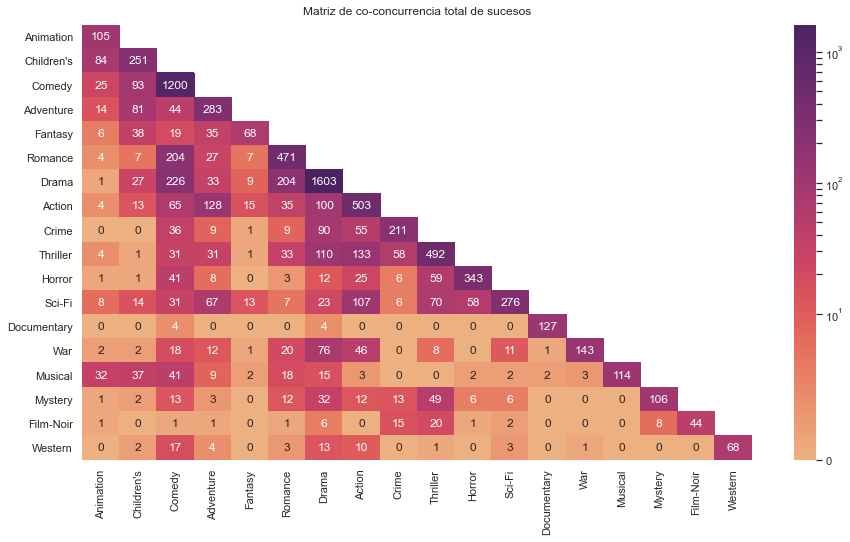

In [91]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.set_style('whitegrid')
sns.heatmap(X,
           annot=True, fmt='d',
           mask=np.tri(18,18,k=-1,dtype=bool).T,
           cmap='flare',
           norm=colors.SymLogNorm(linthresh=10, linscale=1,vmin=0, vmax=1605, base=10)) # Escala semilog

axes.set_title('Matriz de co-concurrencia total de sucesos',pad=10);


# Guardar imagen
plt.savefig('matriz_cocu',dpi=200)


Para facilitar el análisis podemos obtener una matriz con los porcentajes, dividiendo cada columna por el elemento de la diagonal.

In [57]:
# Matriz de coocurrencia en porcentajes
X_diagonal = np.diagonal(X)
with np.errstate(divide='ignore', invalid='ignore'):
    X_pct = np.nan_to_num(np.true_divide(X, X_diagonal[:, None]))

In [58]:
X_pct=pd.DataFrame(X_pct,columns=categorias,index=categorias)
X_pct=round(X_pct,2)

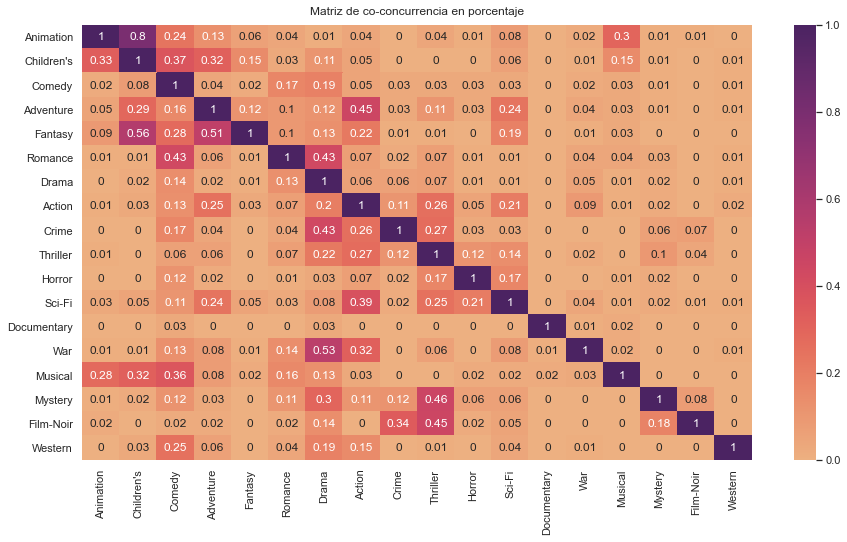

In [92]:
sns.set_theme()

fig, axes = plt.subplots(figsize=(15, 8))

sns.heatmap(X_pct,
           annot=True, 
           cmap='flare',
           );

axes.set_title('Matriz de co-concurrencia en porcentaje',pad=10);


# Guardar imagen
plt.savefig('matriz_cocu_pct',dpi=200)


De este gráfico podemos afirmar lo siguiente:
- La gran mayoría de las películas de animación están etiquetadas para niños y en un 30% de las ocasiones son musicales.
- Las películas para niños suelen ser de animación, comedias o de aventuras.
- Hay dos tipos principlas de películas de romance, comedias románticas o dramas.
- El género bélico está muy asociado al drama y al género de acción.
- Las películas de acción suelen compartir género con aventuras, dramas, thriller y sci-fi.
- Casi la mitad de las peliculas de misterio están catalogadas como thrillers y hasta en una tercera parte de las ocasiones también están etiquetadas como dramas.
- Ciencia ficción es un género muy asociado a aventura, acción, thriller y horror.

## 3.4. Analizando la evolución temporal de los géneros de la filmoteca.
### 3.4.1. Evolución de géneros más populares por año.

Vamos a ver a como se distribuyen las películas de mi filmoteca por género y año. Para ello utilizaré un mapa de calor.

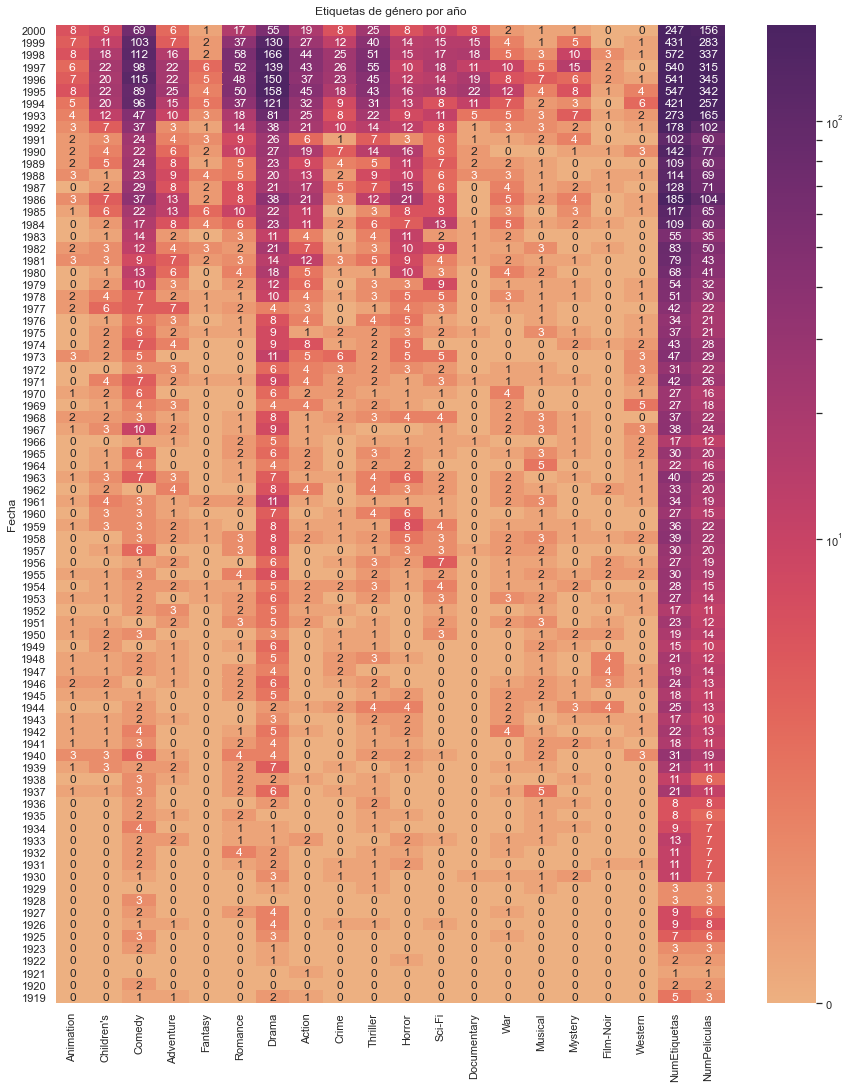

In [87]:
# Heatmap etiquetas de genero por año


# Preparo los datos
etiquetas_heatmap=movies_wide_year.iloc[:,1:-1]

# Creo la figura
plt.figure(figsize=(15,18))
gen_anual=sns.heatmap(data=etiquetas_heatmap,
            cmap='flare',
            annot=True, fmt='d',
            norm=colors.SymLogNorm(linthresh=10, linscale=1,vmin=0, vmax=170, base=10)) # Escala semilog

# Customizo los elementos de la imagen
gen_anual.set_title('Etiquetas de género por año',pad=10);


# Guardar imagen
plt.savefig('genero_year',dpi=200)


In [61]:
# total peliculas
print('El total de peliculas en la filmoteca es: ',etiquetas_heatmap.NumPeliculas.sum())
# total peliculas
print('El total de etiquetas en la filmoteca es: ',etiquetas_heatmap.NumEtiquetas.sum())


El total de peliculas en la filmoteca es:  3883
El total de etiquetas en la filmoteca es:  6408


Con un vistazo al Heatmap puedo obtener la siguiente información:

- La mayoría de las películas de nuestra filmoteca fueron grabadas entre 1980 y 2000.
- Los géneros que han estado continuamente presentes son comedia, drama y en menor medida cine para niños y de aventuras. 
- Drama es el género más aparecido en nuestra filmoteca.
- A partir de la década de los 70 se empieza popularizar como género las películas de acción.
- Sci Fi tuvo un pequeño boom en los 50 y después a partir de los 70 vuelve a aparecer.
- El cine de horror aparece a finales de los 50, se hace popular en los 80 y a partir de los 90 pierde fuerza como género dejando paso al thriller que se hace popular a finales de los 90.
- Las películas de romance estaban de moda entre los años 40 y 50 y luego perdieron importancia hasta que vuelven a aparecer a mediados de los 80.
- El western estan en nuestra filmoteca en dos epocas diferentes, entre los 50s y 60s y en los 90s.


### 3.4.2. Evolución de los géneros más populares por décadas.

Con objeto de agregar la información voy a analizar por décadas mi filmoteca. Hay que tener en cuenta que al haber más  géneros etiquetados que películas no pueden coincidir las sumas de ambas variables.

Podríamos crear una variable que fuese Pct_etiqueta y que tuviese un valor en función del total de etiquetas de ese año y multiplicado el numero de peliculas de ese año. Pero ambas las variables Num. de etiquetas y Num. de peliculas no tienen por que ser iguales.

In [62]:
movies_final_long.head(3)

,Genero,Etiquetas,Ids,Fecha,Peliculas,Decada
0,Animation,1.0,1,1995,0.333333,90s
0,Musical,0.0,1,1995,0.000000,90s
0,Children's,1.0,1,1995,0.333333,90s


Si quiero analizar los generos más populares por década, podría agrupar por decada y por genero y añadir los totales por decada para poder crear una variable que represente el porcentaje de etiquetas por década.

In [63]:
decada=movies_final_long.groupby(['Decada','Genero']).agg({'Etiquetas':'sum',
                                                           'Peliculas':'sum',
                                                          })
decada.head(3)

Etiquetas  Peliculas
Decada Genero                         
20s    Action           2.0        1.5
       Adventure        2.0        1.5
       Animation        0.0        0.0

In [64]:
# Etiquetas y películas Totales por decada 
decada[['Etiquetas','Peliculas']].groupby('Decada').sum().head(3)

,Etiquetas,Peliculas
Decada,,
20s,44.0,37.0
30s,124.0,77.0
40s,210.0,126.0


In [65]:
# Merge etiquetas y peliculas por genero y decada con totales por década.
decada=decada.merge(decada[['Etiquetas','Peliculas']].groupby('Decada').sum(),
                    left_index=True,
                    right_index=True,
                    how='left')


In [66]:
# Renombro las columnas
decada.columns=['Etiquetas', 'Peliculas', 'Etiquetas_total_decada', 'Peliculas_total_decada']


In [67]:
# Porcentage de etiquetas de cada genero por década  
decada['Pct_Genero_Decada']=round(decada.Etiquetas/decada.Etiquetas_total_decada*100,1)
decada.head(3)

Etiquetas  Peliculas  Etiquetas_total_decada  \
Decada Genero                                                    
20s    Action           2.0        1.5                    44.0   
       Adventure        2.0        1.5                    44.0   
       Animation        0.0        0.0                    44.0   

                  Peliculas_total_decada  Pct_Genero_Decada  
Decada Genero                                                
20s    Action                       37.0                4.5  
       Adventure                    37.0                4.5  
       Animation                    37.0                0.0

In [68]:
# Extraigo los indices para poder dibujar el diagrama de barras
decada=decada.reset_index()

In [69]:
# Mapa de colores
colores={'Drama':(31/256,119/256,180/256),
         'Comedy':(174/256,199/256,232/256),
         'Romance':(255/256,127/256,14/256),
         'Sci-Fi':(255/256,187/256,120/256),
         'Horror':(44/256,160/256,44/256),
         'Action':(152/256,223/256,138/256),
         'Musical':(214/256,39/256,40/256),
         'Thriller':(255/256,152/256,150/256),
         'Film-Noir':(148/256,103/256,189/256),
         'Adventure':(197/256,176/256,213/256),
         "Children's":(140/256,86/256,75/256),
         'Western':(196/256,156/256,148/256),
         'War':(227/256,119/256,194/256),
         'Animation':(247/256,182/256,210/256),
         'Mystery':(127/256,127/256,127/256),
         'Crime':(199/256,199/256,199/256),
         'Documentary':(188/256,189/256,34/256),
         'Fantasy':(219/256,219/256,141/256)
        }

<ipython-input-84-2b96db736814>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  im=sns.barplot(data=decada.sort_values(by=['Pct_Genero_Decada'],ascending=[False])[decada['Decada']==j].head(10),
<ipython-input-84-2b96db736814>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  im=sns.barplot(data=decada.sort_values(by=['Pct_Genero_Decada'],ascending=[False])[decada['Decada']==j].head(10),
<ipython-input-84-2b96db736814>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  im=sns.barplot(data=decada.sort_values(by=['Pct_Genero_Decada'],ascending=[False])[decada['Decada']==j].head(10),
<ipython-input-84-2b96db736814>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  im=sns.barplot(data=decada.sort_values(by=['Pct_Genero_Decada'],ascending=[False])[decada['Decada']==j].head(10),
<ipython-input-84-2b96db736814>:19: UserWarning: Boolean Series key will be reindexed to mat

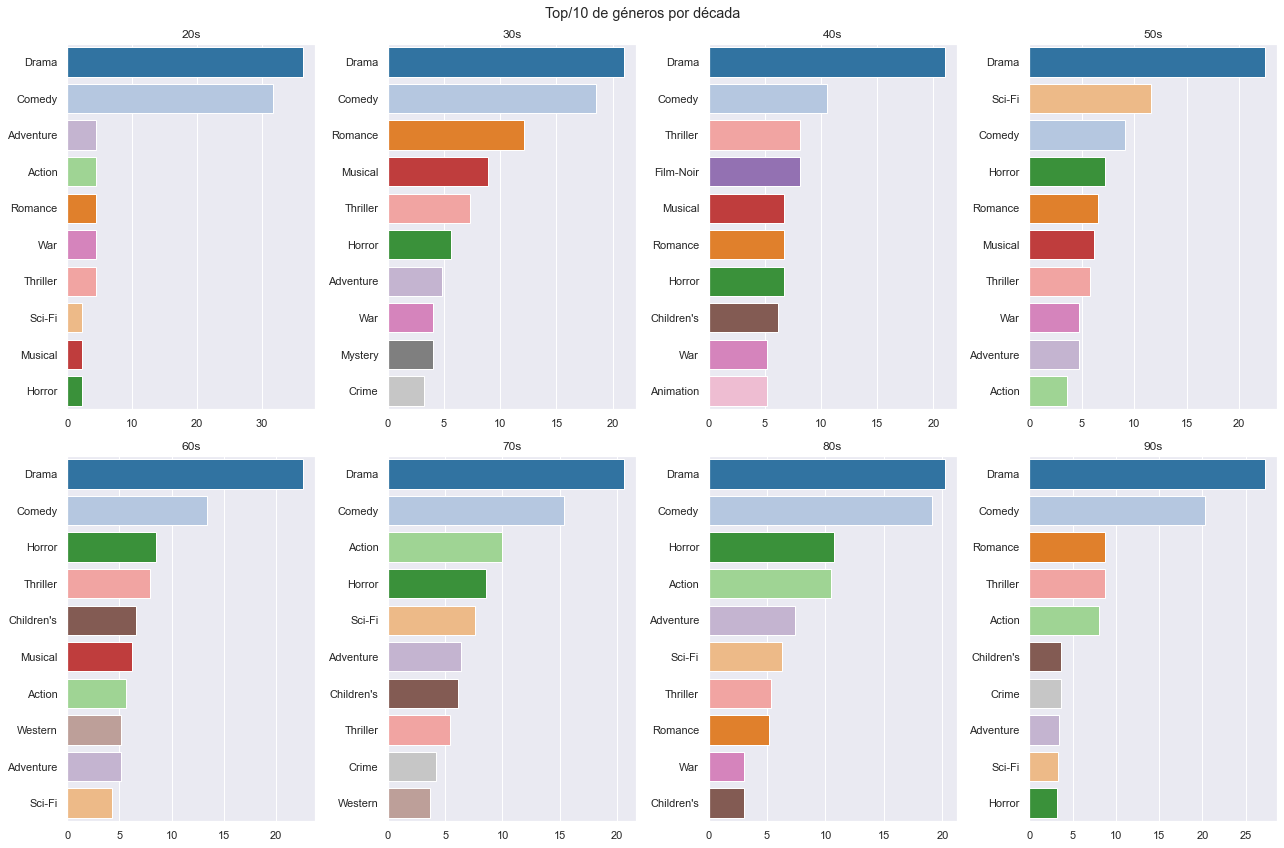

In [84]:
# Diagrama de barras con los géneros más populares por década.
fig,(ax)=plt.subplots(figsize=(18,12),nrows=2,ncols=4, sharey=False, tight_layout=True)

for i,j in enumerate(decada.Decada.unique().tolist()):
        if i <4:
            im=sns.barplot(data=decada.sort_values(by=['Pct_Genero_Decada'],ascending=[False])[decada['Decada']==j].head(10),
                        x='Pct_Genero_Decada',
                        ci=None,
                        y='Genero',
                        color=colores,
                        palette=colores,
                        ax=ax[(0),i],
                        )
            im.set(title=j,
                   ylabel=None,
                   xlabel=None)
            
        else:
            im=sns.barplot(data=decada.sort_values(by=['Pct_Genero_Decada'],ascending=[False])[decada['Decada']==j].head(10),
                        x='Pct_Genero_Decada',
                        ci=None,
                        y='Genero',
                        color=colores,
                        palette=colores,
                        ax=ax[1,i-4],
                        )
            im.set(title=j,
                   ylabel=None,
                   xlabel=None)

fig.suptitle('Top/10 de géneros por década');

# Guardar imagen
plt.savefig('top10_genero_decada',dpi=200)


En el gráfico anterior podemos ver los generos que están en el top 10 cada década.  Vemos que el género drama siempre es el más común en nuestra biblioteca seguide de cerca por la comedia. 

Solo en los años 50 la ciencia ficcion fue capaz de desbancar a la comedia como segundo género más repetido.

Esta misma información podría quedar reflejada en un mapa de calor como el que veremos a continuación.

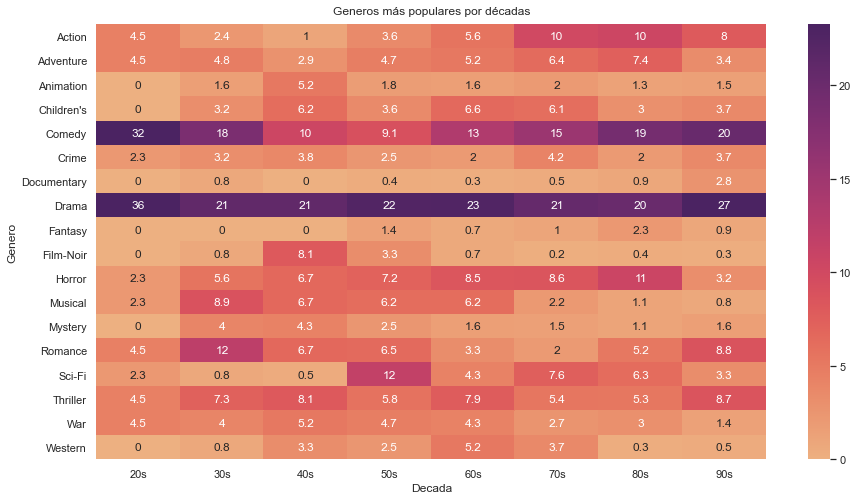

In [82]:
# Dataframe de porcentaje de géneros por década
generos_decada=decada.groupby(['Decada','Genero'])[['Pct_Genero_Decada']].sum().reset_index()

generos_decada=generos_decada.pivot(index='Genero', 
                                    columns='Decada', 
                                    values='Pct_Genero_Decada')#.sort_values(by='Genero',ascending=True)

# Representación gráfica con un heatmap.

fig, axes = plt.subplots(figsize=(15, 8))

gen_dec=sns.heatmap(round(generos_decada,1),
                  annot=True, 
                  cmap='flare',
                  robust=True,
 #                norm=colors.SymLogNorm(linthresh=10, linscale=5,vmin=0, vmax=40, base=10) # Escala semilog
                  )

#Configuración
axes.set_title('Generos más populares por décadas',pad=10);

# Guardar imagen
plt.savefig('genero_decada',dpi=200)
